In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv(r"C:\Users\sasan\Downloads\train.csv")
train.head()

Unnamed: 0   id  lead_time  arrival_week  duration  prev_cancel  \
0           1  200        245            13         5            0   
1           2  201        170            25         2            0   
2           3  202        304            45         3            0   
3           4  203         19             7         1            0   
4           5  204        214            27         4            0   

   booking_changes  waiting_period  per_Day_price  parking  special_request  \
0                0               0          78.26        0                2   
1                0               0         130.50        0                0   
2                0               0          89.00        0                0   
3                0               0          82.13        0                2   
4                0               0          89.10        0                1   

         segment          deposit        cust_type  is_cancelled  
0      Online TA  No Deposit             Transient             0  
1      Online TA  No Deposit             Transient             0  
2  Offline TA/TO  Non Refund             Transient             1  
3      Online TA  No Deposit             Transient             0  
4         Direct  No Deposit       Transient-Party             0

In [3]:
test = pd.read_csv(r"C:\Users\sasan\Downloads\test.csv")
test_data = test.drop(labels = ["Unnamed: 0","id"],axis = 1)
test_data.columns

Index(['lead_time', 'arrival_week', 'duration', 'prev_cancel',
       'booking_changes', 'waiting_period', 'per_Day_price', 'parking',
       'special_request', 'segment', 'deposit', 'cust_type'],
      dtype='object')

In [13]:
train_data = train.drop(labels = ["Unnamed: 0","id"],axis = 1)
train_data.columns

Index(['lead_time', 'arrival_week', 'duration', 'prev_cancel',
       'booking_changes', 'waiting_period', 'per_Day_price', 'parking',
       'special_request', 'segment', 'deposit', 'cust_type', 'is_cancelled'],
      dtype='object')

In [14]:
train_data.dtypes

lead_time            int64
arrival_week         int64
duration             int64
prev_cancel          int64
booking_changes      int64
waiting_period       int64
per_Day_price      float64
parking              int64
special_request      int64
segment             object
deposit             object
cust_type           object
is_cancelled         int64
dtype: object

In [15]:
print(train_data.isnull().sum(),train_data.isna().sum())

lead_time          0
arrival_week       0
duration           0
prev_cancel        0
booking_changes    0
waiting_period     0
per_Day_price      0
parking            0
special_request    0
segment            0
deposit            0
cust_type          0
is_cancelled       0
dtype: int64 lead_time          0
arrival_week       0
duration           0
prev_cancel        0
booking_changes    0
waiting_period     0
per_Day_price      0
parking            0
special_request    0
segment            0
deposit            0
cust_type          0
is_cancelled       0
dtype: int64


In [16]:
# Identify numeric and categorical variables
numeric_vars = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_vars.remove("is_cancelled")
categorical_vars = train_data.select_dtypes(include=['object']).columns.tolist()


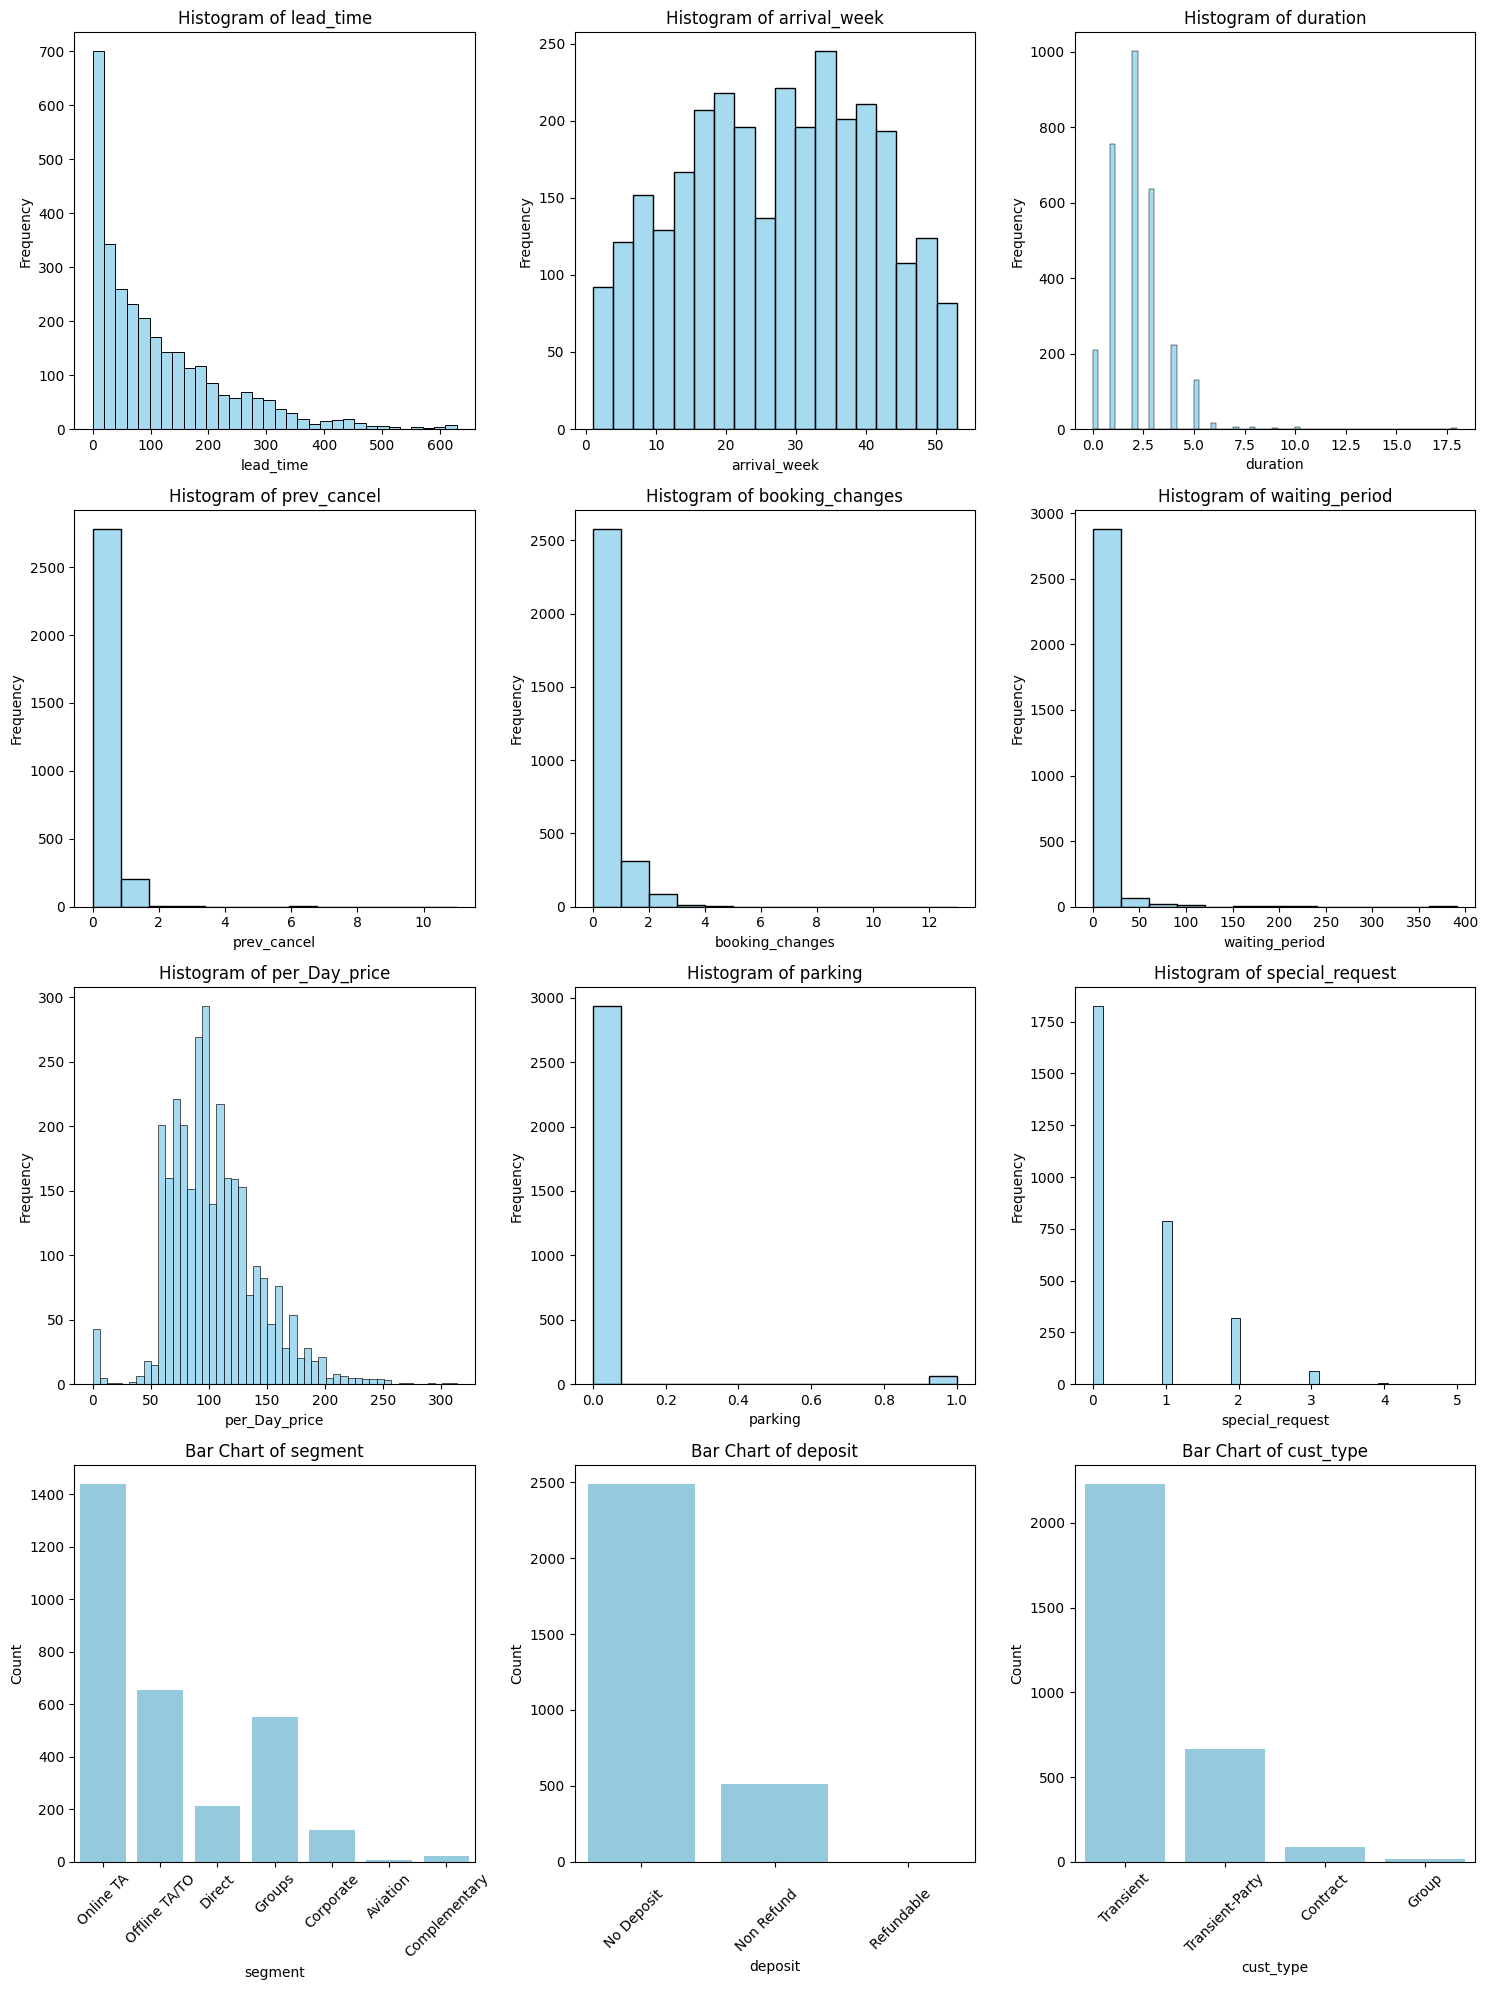

In [19]:
num_plots = len(numeric_vars) + len(categorical_vars)
cols = 3
rows = (num_plots // cols) + 1 if num_plots % cols != 0 else num_plots // cols

plt.figure(figsize=(cols * 5, rows * 5))

# Plotting histograms for numeric variables
for index, var in enumerate(numeric_vars):
    plt.subplot(rows, cols, index + 1)
    sns.histplot(train_data[var], color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

# Plotting bar charts for categorical variables
for index, var in enumerate(categorical_vars):
    plt.subplot(rows, cols, len(numeric_vars) + index + 1)
    sns.countplot(x=var, data=train_data,color='skyblue')
    plt.title(f'Bar Chart of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [22]:
train_data.describe()

lead_time  arrival_week     duration  prev_cancel  booking_changes  \
count  3000.0000   3000.000000  3000.000000  3000.000000      3000.000000   
mean    110.8670     27.215333     2.187333     0.084667         0.189000   
std     112.8239     13.414008     1.449692     0.392704         0.569257   
min       0.0000      1.000000     0.000000     0.000000         0.000000   
25%      23.0000     17.000000     1.000000     0.000000         0.000000   
50%      75.0000     28.000000     2.000000     0.000000         0.000000   
75%     166.0000     38.000000     3.000000     0.000000         0.000000   
max     629.0000     53.000000    18.000000    11.000000        13.000000   

       waiting_period  per_Day_price      parking  special_request  \
count     3000.000000    3000.000000  3000.000000      3000.000000   
mean         3.325000     104.660693     0.022333         0.547667   
std         20.426611      38.304952     0.147790         0.786512   
min          0.000000       0.000000     0.000000         0.000000   
25%          0.000000      79.000000     0.000000         0.000000   
50%          0.000000      99.000000     0.000000         0.000000   
75%          0.000000     125.000000     0.000000         1.000000   
max        391.000000     313.670000     1.000000         5.000000   

       is_cancelled  
count   3000.000000  
mean       0.409667  
std        0.491854  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

In [23]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [24]:
encoded_train = pd.DataFrame(ohe.fit_transform(train_data[categorical_vars]).toarray(),
                                  columns=ohe.get_feature_names_out(categorical_vars))

encoded_test = pd.DataFrame(ohe.fit_transform(test_data[categorical_vars]).toarray(),
 columns=ohe.get_feature_names_out(categorical_vars))

encoded_train, encoded_test = encoded_train.align(encoded_test, join='left', axis=1)
encoded_test.fillna(0,inplace = True)

In [25]:
X_train = train_data[numeric_vars]
y_train = train_data["is_cancelled"]
print(X_train.columns,y.name)

NameError: name 'y' is not defined

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std_train = pd.DataFrame(scaler.fit_transform(X_train[numeric_vars]),columns=numeric_vars)
X_std_test = pd.DataFrame(scaler.fit_transform(test_data[numeric_vars]),columns=numeric_vars)

In [27]:
final_train_data = pd.concat([X_std_train,encoded_train],axis = 1)
final_test_data = pd.concat([X_std_test,encoded_test],axis = 1)
final_train_data.describe()

lead_time  arrival_week      duration   prev_cancel  \
count  3.000000e+03  3.000000e+03  3.000000e+03  3.000000e+03   
mean  -5.921189e-17 -2.013204e-17  1.580958e-16 -1.006602e-17   
std    1.000167e+00  1.000167e+00  1.000167e+00  1.000167e+00   
min   -9.828191e-01 -1.954651e+00 -1.509078e+00 -2.156352e-01   
25%   -7.789276e-01 -7.616692e-01 -8.191611e-01 -2.156352e-01   
50%   -3.179555e-01  5.850582e-02 -1.292444e-01 -2.156352e-01   
75%    4.887457e-01  8.041194e-01  5.606723e-01 -2.156352e-01   
max    4.593170e+00  1.922540e+00  1.090942e+01  2.779997e+01   

       booking_changes  waiting_period  per_Day_price       parking  \
count     3.000000e+03    3.000000e+03   3.000000e+03  3.000000e+03   
mean      1.065814e-17   -3.552714e-17   5.234331e-16  1.657933e-17   
std       1.000167e+00    1.000167e+00   1.000167e+00  1.000167e+00   
min      -3.320670e-01   -1.628050e-01  -2.732757e+00 -1.511407e-01   
25%      -3.320670e-01   -1.628050e-01  -6.700171e-01 -1.511407e-01   
50%      -3.320670e-01   -1.628050e-01  -1.478043e-01 -1.511407e-01   
75%      -3.320670e-01   -1.628050e-01   5.310723e-01 -1.511407e-01   
max       2.250852e+01    1.898208e+01   5.457366e+00  6.616352e+00   

       special_request  segment_Aviation  ...  segment_Groups  \
count     3.000000e+03       3000.000000  ...     3000.000000   
mean      2.605323e-17          0.001667  ...        0.183667   
std       1.000167e+00          0.040798  ...        0.387277   
min      -6.964396e-01          0.000000  ...        0.000000   
25%      -6.964396e-01          0.000000  ...        0.000000   
50%      -6.964396e-01          0.000000  ...        0.000000   
75%       5.752091e-01          0.000000  ...        0.000000   
max       5.661804e+00          1.000000  ...        1.000000   

       segment_Offline TA/TO  segment_Online TA  deposit_No Deposit       \
count            3000.000000        3000.000000              3000.000000   
mean                0.217333           0.479667                 0.830000   
std                 0.412500           0.499670                 0.375695   
min                 0.000000           0.000000                 0.000000   
25%                 0.000000           0.000000                 1.000000   
50%                 0.000000           0.000000                 1.000000   
75%                 0.000000           1.000000                 1.000000   
max                 1.000000           1.000000                 1.000000   

       deposit_Non Refund       deposit_Refundable       cust_type_Contract  \
count              3000.000000              3000.000000         3000.000000   
mean                  0.169667                 0.000333            0.029667   
std                   0.375402                 0.018257            0.169694   
min                   0.000000                 0.000000            0.000000   
25%                   0.000000                 0.000000            0.000000   
50%                   0.000000                 0.000000            0.000000   
75%                   0.000000                 0.000000            0.000000   
max                   1.000000                 1.000000            1.000000   

       cust_type_Group  cust_type_Transient  cust_type_Transient-Party  
count      3000.000000          3000.000000                3000.000000  
mean          0.005333             0.743667                   0.221333  
std           0.072847             0.436681                   0.415214  
min           0.000000             0.000000                   0.000000  
25%           0.000000             0.000000                   0.000000  
50%           0.000000             1.000000                   0.000000  
75%           0.000000             1.000000                   0.000000  
max           1.000000             1.000000                   1.000000  

[8 rows x 23 columns]

In [28]:
final_test_data.describe()

lead_time  arrival_week      duration   prev_cancel  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03   
mean   6.394885e-17 -3.730349e-17 -6.039613e-17 -3.730349e-17   
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00   
min   -1.009268e+00 -1.926020e+00 -1.364690e+00 -1.913687e-01   
25%   -7.964577e-01 -7.825288e-01 -7.480203e-01 -1.913687e-01   
50%   -2.968153e-01 -2.020167e-02 -1.313506e-01 -1.913687e-01   
75%    4.804062e-01  8.183582e-01  4.853190e-01 -1.913687e-01   
max    4.588577e+00  2.038082e+00  1.220204e+01  2.517075e+01   

       booking_changes  waiting_period  per_Day_price       parking  \
count     1.000000e+03    1.000000e+03   1.000000e+03  1.000000e+03   
mean     -5.861978e-17    5.151435e-17   1.989520e-16 -2.842171e-17   
std       1.000500e+00    1.000500e+00   1.000500e+00  1.000500e+00   
min      -2.630025e-01   -1.744403e-01  -2.570878e+00 -1.499830e-01   
25%      -2.630025e-01   -1.744403e-01  -6.700147e-01 -1.499830e-01   
50%      -2.630025e-01   -1.744403e-01  -1.248520e-01 -1.499830e-01   
75%      -2.630025e-01   -1.744403e-01   5.265355e-01 -1.499830e-01   
max       2.188458e+01    1.208850e+01   4.510770e+00  6.667424e+00   

       special_request  segment_Aviation  ...  segment_Groups  \
count     1.000000e+03       1000.000000  ...     1000.000000   
mean     -4.618528e-17          0.005000  ...        0.175000   
std       1.000500e+00          0.070569  ...        0.380157   
min      -6.765525e-01          0.000000  ...        0.000000   
25%      -6.765525e-01          0.000000  ...        0.000000   
50%      -6.765525e-01          0.000000  ...        0.000000   
75%       6.792641e-01          0.000000  ...        0.000000   
max       4.746714e+00          1.000000  ...        1.000000   

       segment_Offline TA/TO  segment_Online TA  deposit_No Deposit       \
count            1000.000000        1000.000000              1000.000000   
mean                0.202000           0.499000                 0.832000   
std                 0.401693           0.500249                 0.374053   
min                 0.000000           0.000000                 0.000000   
25%                 0.000000           0.000000                 1.000000   
50%                 0.000000           0.000000                 1.000000   
75%                 0.000000           1.000000                 1.000000   
max                 1.000000           1.000000                 1.000000   

       deposit_Non Refund       deposit_Refundable       cust_type_Contract  \
count              1000.000000                   1000.0         1000.000000   
mean                  0.168000                      0.0            0.027000   
std                   0.374053                      0.0            0.162164   
min                   0.000000                      0.0            0.000000   
25%                   0.000000                      0.0            0.000000   
50%                   0.000000                      0.0            0.000000   
75%                   0.000000                      0.0            0.000000   
max                   1.000000                      0.0            1.000000   

       cust_type_Group  cust_type_Transient  cust_type_Transient-Party  
count      1000.000000          1000.000000                1000.000000  
mean          0.004000             0.759000                   0.210000  
std           0.063151             0.427904                   0.407512  
min           0.000000             0.000000                   0.000000  
25%           0.000000             1.000000                   0.000000  
50%           0.000000             1.000000                   0.000000  
75%           0.000000             1.000000                   0.000000  
max           1.000000             1.000000                   1.000000  

[8 rows x 23 columns]

In [ ]:
!pip install xgboost lightgbm catboost

In [31]:
final_train_data[['lead_time','arrival_week']].pivot()

TypeError: DataFrame.pivot() missing 1 required keyword-only argument: 'columns'

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score


X_train, X_val, y_train, y_val = train_test_split(final_train_data,y_train,test_size = 0.3, random_state=2024)


In [24]:
best_model = GaussianNB()
max_accuracy = 0

for i in [0.1,0.15,0.2,0.25,0.3]:
    X_train, X_val, y_train, y_val = train_test_split(final_train_data,y,test_size = i, random_state=2024)
    models = {
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC(),
    'XGBClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier(verbose = -1),
    'CatBoostClassifier': CatBoostClassifier(verbose = False)
    }
    accuracies = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_true=y_val,y_pred=y_pred)
        # print(f"{name} model accuracy = {accuracy}")
        accuracies[name] = accuracy
    accuracies = [(k,v) for k,v in sorted(accuracies.items(),key = lambda x: x[1],reverse = True)]
    curr_best_accuracy = accuracies[0][-1]
    curr_best_model = accuracies[0][0]
    print(f"Best model for {int((1-i)*100)}:{int(i*100)} validation data split = {curr_best_model}\nAccuracy = {curr_best_accuracy}")
    if curr_best_accuracy >= max_accuracy:
        best_model = models[curr_best_model]
        max_accuracy = curr_best_accuracy


Best model for 90:10 validation data split = RandomForestClassifier
Accuracy = 0.84
Best model for 85:15 validation data split = CatBoostClassifier
Accuracy = 0.8511111111111112
Best model for 80:20 validation data split = CatBoostClassifier
Accuracy = 0.8383333333333334
Best model for 75:25 validation data split = CatBoostClassifier
Accuracy = 0.8306666666666667
Best model for 70:30 validation data split = CatBoostClassifier
Accuracy = 0.8233333333333334


In [253]:
correlations = pd.concat([final_train_data,y],axis = 1).corr()['is_cancelled'].sort_values(ascending=False, key=abs)
correlations.drop("is_cancelled",inplace=True)
print(correlations[])

0.5426319565594655


C:\Users\sasan\AppData\Local\Temp\ipykernel_33688\1496551125.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(correlations[0])


In [215]:
from sklearn.model_selection import GridSearchCV

parameters = {'depth'         : [4,6,8,10],
                'learning_rate' : [0.001,0.005,0.01,0.05,0.1],
                'iterations'    : [10,50,100,500]
            }
model = CatBoostClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, scoring='accuracy',verbose = 100)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5; 1/80] START depth=4, iterations=10, learning_rate=0.001................
0:	learn: 0.6923315	total: 14.8ms	remaining: 133ms
1:	learn: 0.6916226	total: 16.4ms	remaining: 65.4ms
2:	learn: 0.6908932	total: 17.8ms	remaining: 41.6ms
3:	learn: 0.6901844	total: 19.3ms	remaining: 28.9ms
4:	learn: 0.6893194	total: 20.9ms	remaining: 20.9ms
5:	learn: 0.6886150	total: 22.3ms	remaining: 14.9ms
6:	learn: 0.6878771	total: 23.7ms	remaining: 10.2ms
7:	learn: 0.6871706	total: 25.1ms	remaining: 6.27ms
8:	learn: 0.6864570	total: 26.6ms	remaining: 2.95ms
9:	learn: 0.6856766	total: 28ms	remaining: 0us
[CV 1/5; 1/80] END depth=4, iterations=10, learning_rate=0.001;, score=0.769 total time=   0.0s
[CV 2/5; 1/80] START depth=4, iterations=10, learning_rate=0.001................
0:	learn: 0.6923351	total: 1.39ms	remaining: 12.5ms
1:	learn: 0.6916096	total: 2.88ms	remaining: 11.5ms
2:	learn: 0.6909015	total: 4.36ms	remaining: 10.2ms
3:	learn: 

{'mean_fit_time': array([0.05191703, 0.03873849, 0.04631443, 0.04462872, 0.03782387,
        0.09789987, 0.10707145, 0.1158216 , 0.13120852, 0.1318006 ,
        0.21474938, 0.19760604, 0.19917607, 0.18863416, 0.1970861 ,
        0.9044558 , 0.98512149, 0.97258906, 0.98138771, 1.00276437,
        0.05601554, 0.05050979, 0.04812856, 0.04780831, 0.04931574,
        0.14826717, 0.15132151, 0.14793019, 0.15615053, 0.15044932,
        0.27614102, 0.29903345, 0.27978773, 0.28977695, 0.27467327,
        1.3288053 , 1.30177112, 1.30457106, 1.32743745, 1.33610458,
        0.06451149, 0.05964556, 0.0622303 , 0.06333237, 0.07167182,
        0.2232563 , 0.22388153, 0.22412548, 0.23512425, 0.22282944,
        0.42417459, 0.44393463, 0.43302064, 0.44808269, 0.45470104,
        2.10366764, 2.21003952, 2.21178031, 2.29641056, 2.31296515,
        0.14483986, 0.14023752, 0.14779859, 0.14012141, 0.13230057,
        0.5659759 , 0.5863903 , 0.5987658 , 0.64391308, 0.62669172,
        1.11876802, 1.18919683,

In [214]:
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_val)
accuracy = accuracy_score(y_true = y_val, y_pred = y_pred)
print(f"Best model accuracy score = {accuracy}")

Best model accuracy score = 0.84


In [206]:
models['CatBoostClassifier'].get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'Logloss',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'class_names': [0, 1],
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'lo